In [1]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from termcolor import colored

In [17]:
!pip install rfpimp

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
  Preparing metadata (setup.py) ... done
  Created wheel for rfpimp: filename=rfpimp-1.3.7-py3-none-any.whl size=10666 sha256=320d6675a1722ed387cb53e36a84bf5752edb09ef213d3c98ed3e0b42ae99311
  Stored in directory: /tmp/pip-ephem-wheel-cache-y3jka_t5/wheels/8a/42/e5/d2e9d77df351103d7d16dbc82ce6090cb2f71cee74b7380b7b
Successfully built rfpimp


In [12]:
df = pd.read_excel('data.xlsx', sheet_name='VU', skiprows=1, header=0)
df['КГФ_1'] = df['КГФ_1'].apply(lambda x: x*1000)
df['КГФ'] = df['КГФ'].mask(df['КГФ'].isna(), df['КГФ_1'])
df

,Номер,Unnamed: 1,Глубина манометра,Dшт,Руст,Рзаб,Pлин,Руст.1,Рзаб.1,Рлин,...,Рпл. Тек (Карноухов),Pсб,Pсб.1,Ro_g,Ro_c,Ro_w,Удельная плотность газа,G_total,КГФ,КГФ_1
0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,804.0,2008-06-05,3576.3,7.94,249.6,370.1,101.8,249.0,359.6,101.8,...,-,93.6,92.376018,0.806017,801.0,1000.0,0.669449,2.782623,311.9094,NaN
2,804.0,2008-06-06,3576.3,9.53,233.5,364.6,101.3,231.0,338.1,102.4,...,-,92.9,91.685171,0.806017,801.0,1000.0,0.669449,3.697781,288.6003,NaN
3,804.0,2008-06-07,3576.3,11.11,213.4,357.1,101.6,211.0,314.8,100.6,...,-,91.4,90.204787,0.806017,801.0,1000.0,0.669449,4.515073,248.7906,NaN
4,804.0,2008-06-08,3576.3,12.70,191.6,347.4,98.4,187.0,291.5,99,...,-,89.2,88.033555,0.806017,801.0,1000.0,0.669449,5.217673,223.5591,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,22505.0,2009-09-23,3678,12.70,182.2,271.586,93.255111,179.0,258.6,92.702141,...,60.8,89.7,88.527017,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182,22505.0,2009-09-27,3678,14.29,157.0,249.076,96.472143,153.0,233.5,100.060417,...,60.8,87.3,86.158401,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183,22505.0,2010-04-09,3679.5,7.94,211.9,289.3877,91.131226,208.0,289.6,91.304642,...,61.3,88.2,87.046632,NaN,NaN,NaN,NaN,NaN,NaN,NaN
184,22505.0,2010-04-14,3679.5,9.53,204.0,282.8709,91.173008,201.0,275.3,91.616821,...,61.3,88.5,87.342709,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
del df["Номер"]
del df["КГФ_1"]
del df["Unnamed: 1"]
df.dropna(axis = 0, subset = ['G_total','КГФ'], how = 'all', inplace = True)
df=df.replace({'':np.NaN})
df=df.replace({'-':np.NaN})
df=df.replace({'не спускался':np.NaN})
df.dropna(thresh=55 ,axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 1 to 168
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Глубина манометра               90 non-null     float64
 1   Dшт                             93 non-null     float64
 2   Руст                            93 non-null     float64
 3   Рзаб                            90 non-null     float64
 4   Pлин                            93 non-null     float64
 5   Руст.1                          93 non-null     float64
 6   Рзаб.1                          90 non-null     float64
 7   Рлин                            93 non-null     float64
 8   Туст                            93 non-null     float64
 9   Тна шлейфе                      60 non-null     float64
 10  Тзаб                            90 non-null     float64
 11  Tлин                            93 non-null     float64
 12  Дебит газа                      93 no

In [14]:
for column in df.columns:
    df[column] = df[column].fillna((df[column].mean()))
df.info()
df_copy = df.copy()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 1 to 168
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Глубина манометра               93 non-null     float64
 1   Dшт                             93 non-null     float64
 2   Руст                            93 non-null     float64
 3   Рзаб                            93 non-null     float64
 4   Pлин                            93 non-null     float64
 5   Руст.1                          93 non-null     float64
 6   Рзаб.1                          93 non-null     float64
 7   Рлин                            93 non-null     float64
 8   Туст                            93 non-null     float64
 9   Тна шлейфе                      93 non-null     float64
 10  Тзаб                            93 non-null     float64
 11  Tлин                            93 non-null     float64
 12  Дебит газа                      93 no

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from rfpimp import permutation_importances

y_train = df_copy['КГФ']
del df_copy['КГФ']
y_train1 = df_copy['G_total']
del df_copy['G_total']
X_train = df_copy
rf = RandomForestRegressor(n_estimators = 100,
                           n_jobs = -1,
                           oob_score = True,
                           bootstrap = True,
                           random_state = 49)
rf.fit(X_train, y_train)

def r2(rf, X_train, y_train):
    return r2_score(y_train, rf.predict(X_train))

perm_imp_rfpimp = permutation_importances(rf, X_train, y_train, r2)
print(perm_imp_rfpimp)

                                Importance
Feature                                   
Рпл. Тек (послед точка на КВД)    0.635368
Туст                              0.077082
Дебит гааз                        0.063123
Ro_c                              0.038109
Рпл. Тек (Расчет по КВД)          0.031066
Рзаб                              0.019709
Руст.1                            0.019466
Дебит воды                        0.013041
Рзаб.1                            0.011996
Глубина манометра                 0.011534
Рлин                              0.008147
Дебит газа                        0.007884
Руст                              0.006645
Тна шлейфе                        0.006596
Дебит кон нестабильный            0.006525
Дебит смеси                       0.005827
Нэф                               0.005813
Tлин                              0.005703
Дебит воды.1                      0.005032
Тзаб                              0.004774
Pлин                              0.004413
Дебит ст. к

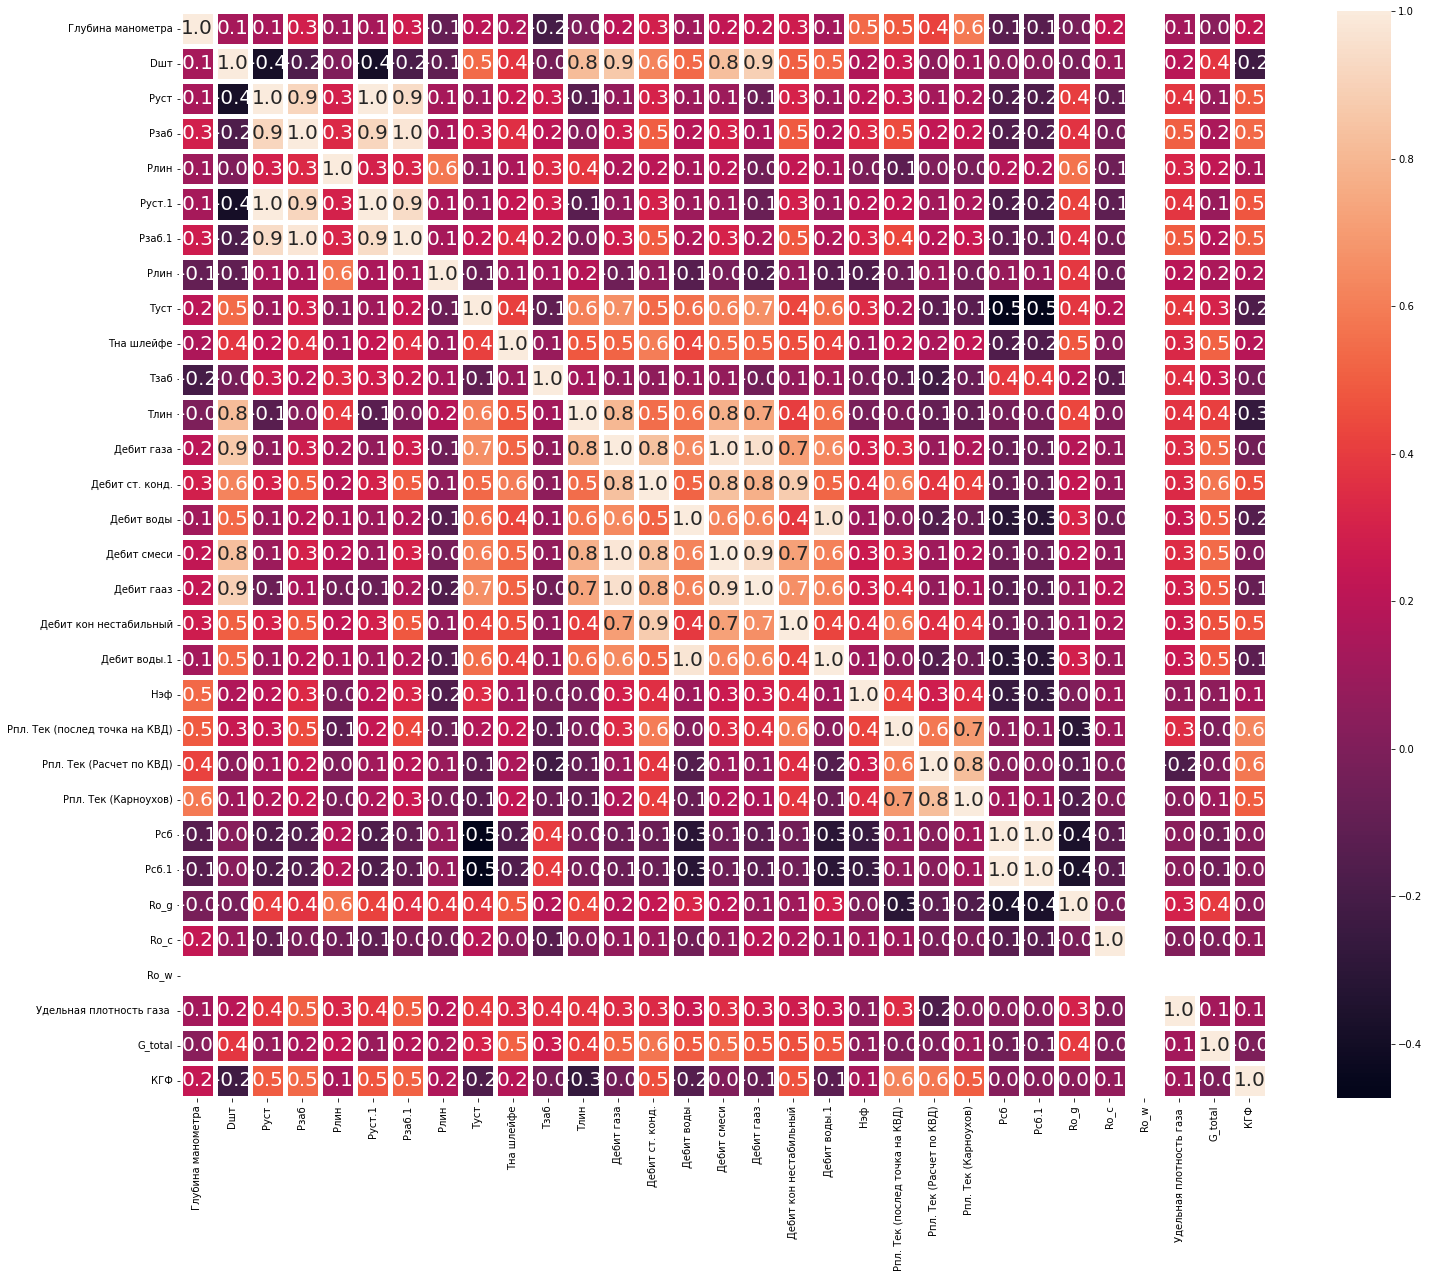

In [29]:
plt.subplots(figsize=(25, 20))
hm = sns.heatmap(df.corr(),
                 cbar=True,
                 annot=True, annot_kws={'size':20}, linewidths=5, square=True, fmt=".1f",)



In [22]:
df_copy.describe()

,Глубина манометра,Dшт,Руст,Рзаб,Pлин,Руст.1,Рзаб.1,Рлин,Туст,Тна шлейфе,...,Нэф,Рпл. Тек (послед точка на КВД),Рпл. Тек (Расчет по КВД),Рпл. Тек (Карноухов),Pсб,Pсб.1,Ro_g,Ro_c,Ro_w,Удельная плотность газа
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,...,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.0,93.000000
mean,3524.086667,10.951183,228.293412,331.762255,99.860962,227.644269,330.334444,98.005453,56.172043,43.091667,...,52.703325,40.682881,50.943684,50.773438,95.162366,93.917953,0.807631,780.847527,1000.0,0.665260
std,142.099771,2.423172,41.897238,55.552713,7.300663,41.757127,55.431005,12.425851,11.250781,15.697842,...,12.149424,5.226271,4.082894,3.315518,5.136060,5.068897,0.007372,62.795111,0.0,0.020485
min,3276.000000,6.350000,138.157895,174.000000,73.306638,136.000000,174.000000,40.739839,24.200000,14.000000,...,30.000000,29.170000,39.900000,41.600000,85.500000,84.381939,0.787416,186.000000,1000.0,0.570000
25%,3437.000000,9.530000,201.636750,298.690000,95.945951,200.000000,296.800000,95.335032,50.300000,36.300000,...,44.200000,37.210000,48.300000,50.100000,90.700000,89.513940,0.807631,782.000000,1000.0,0.660000
50%,3576.300000,11.110000,229.894737,336.700000,100.800000,228.000000,331.700000,100.260000,58.000000,43.091667,...,56.800000,40.350000,50.859600,50.773438,94.200000,92.968172,0.807631,787.000000,1000.0,0.667000
75%,3650.000000,12.700000,252.000000,362.800000,103.865199,252.000000,359.900000,104.000000,64.000000,43.091667,...,63.500000,42.860000,54.900000,51.700000,99.800000,98.494942,0.807631,793.700000,1000.0,0.679000
max,3670.000000,15.880000,337.108108,458.600000,121.682930,333.000000,458.500000,123.616800,75.000000,110.200000,...,72.539800,53.270000,56.700000,56.800000,104.000000,102.640020,0.824330,801.000000,1000.0,0.684660


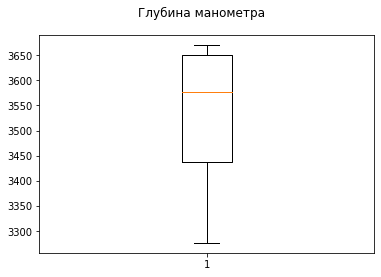

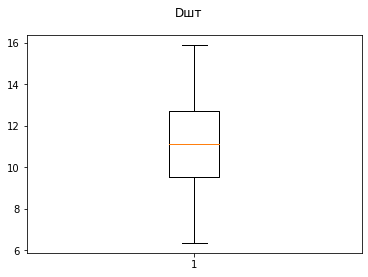

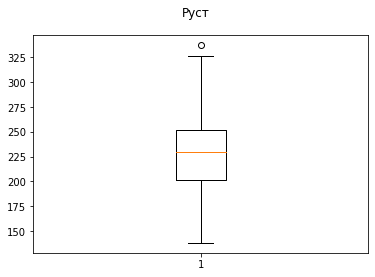

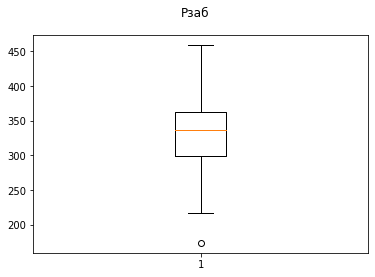

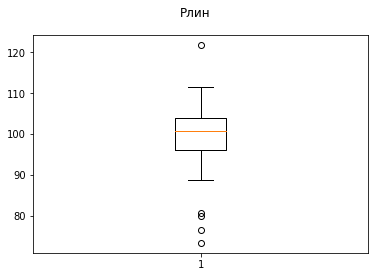

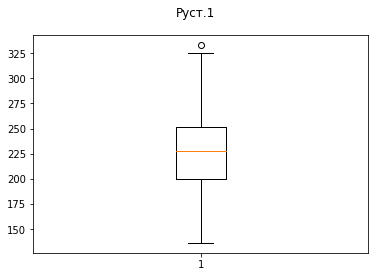

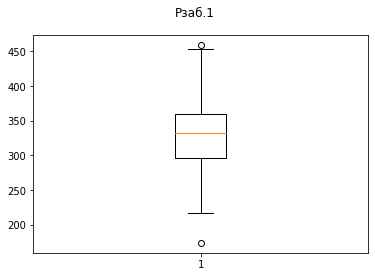

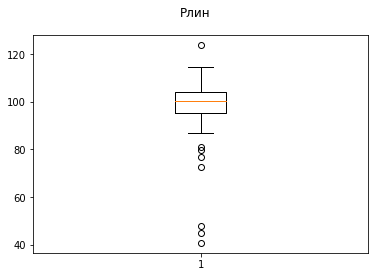

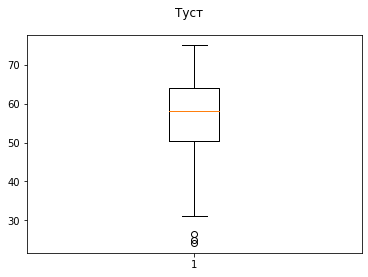

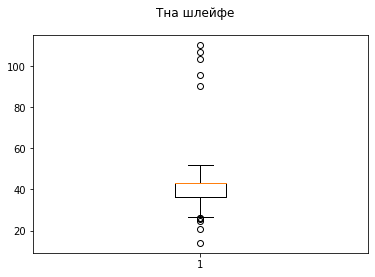

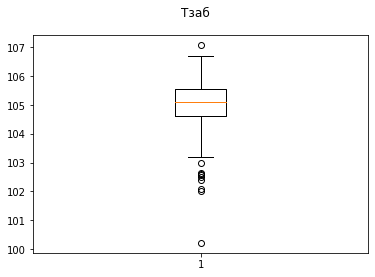

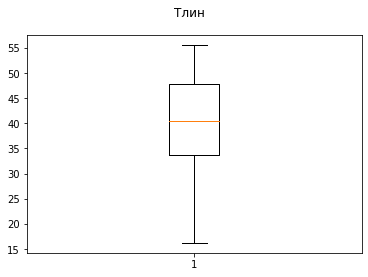

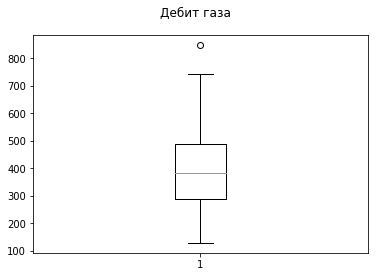

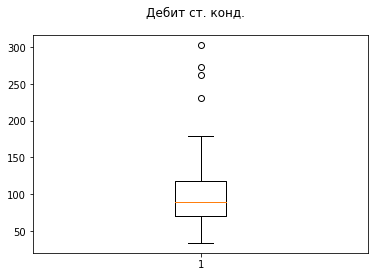

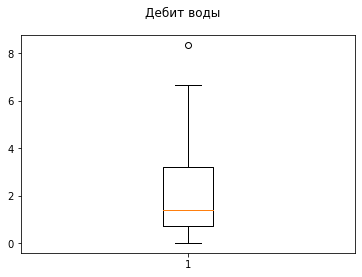

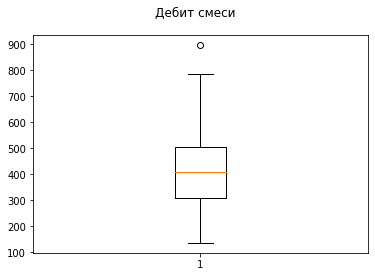

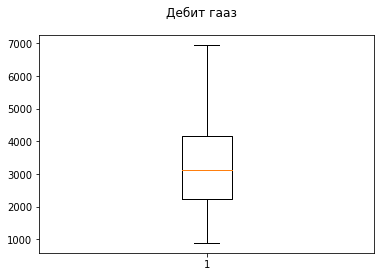

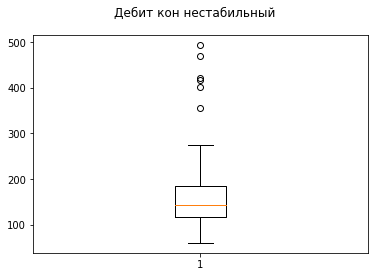

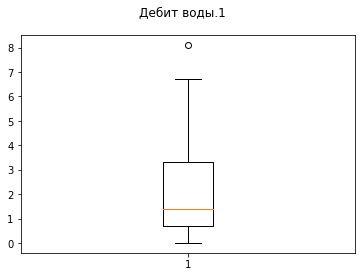

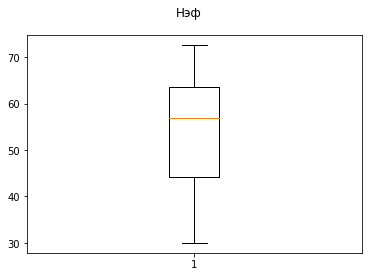

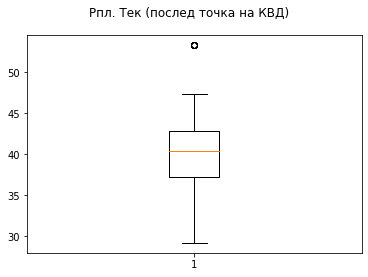

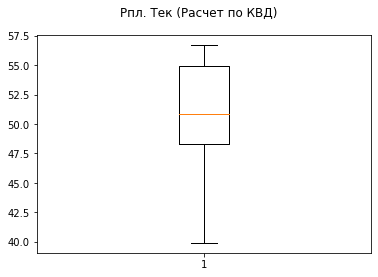

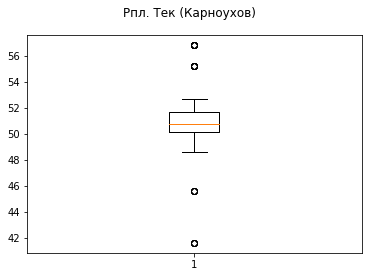

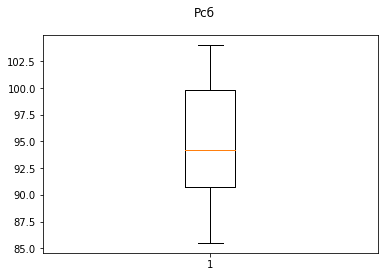

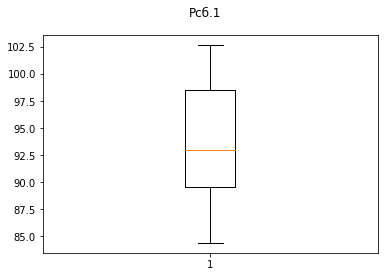

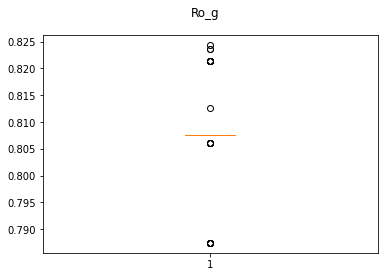

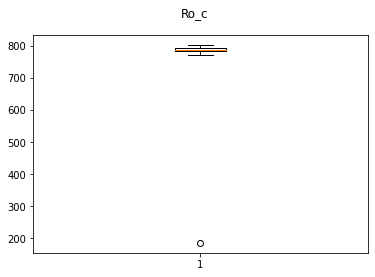

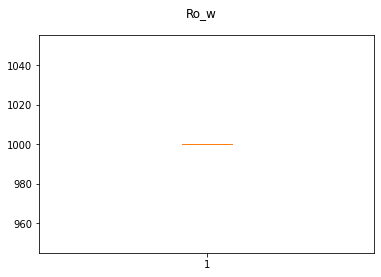

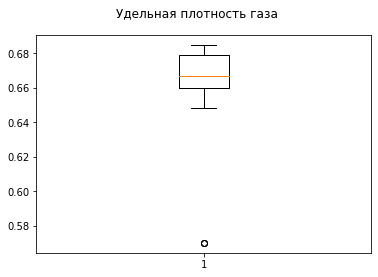

In [24]:
for column in df_copy.columns:
    
    fig = plt.figure() 
    fig.suptitle(column)
    plt.boxplot(x=df_copy[column])
    plt.show()

KeyError: 0

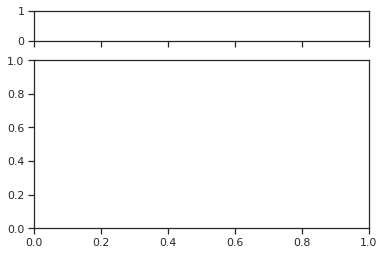

In [34]:
sns.set(style="ticks")
for x in df.columns:

    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                    gridspec_kw={"height_ratios": (.15, .85)})
    sns.boxplot(df_copy[x], ax=ax_box)
    sns.histplot(df_copy[x], kde=True, ax=ax_hist)

    ax_box.set(yticks=[])
    sns.despine(ax=ax_hist)
    sns.despine(ax=ax_box, left=True)